In [15]:
import Bio
from localalign import localAllignment
from globalalign import globalAllignment
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from muscle import muscle
import matplotlib.pyplot as plt
from Bio import Phylo

((Endozoicomonas:0.05754,Shewanella:0.07293)Inner1:0.03039,Fictibacillus:0.11872,Ruegeria:0.35049)Inner2:0.00000;



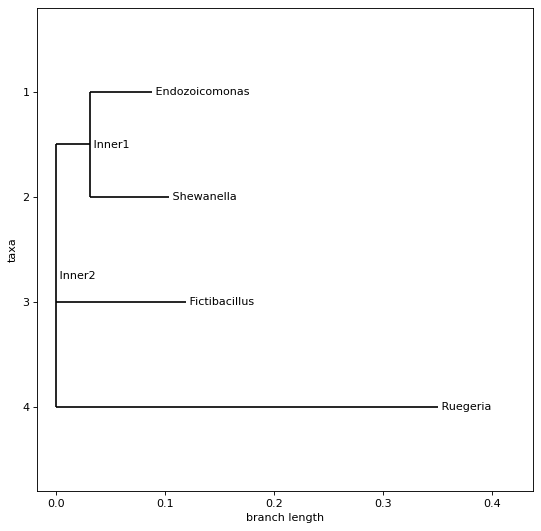

In [16]:

# seqe = muscle("./data/Group_7.fasta")

# print("Sequence 1: ", seqe)
# Read the multiple sequence alignment
alignment = AlignIO.read("./data/alig.fasta", "fasta")

# Create the MultipleSeqAlignment object
msa = MultipleSeqAlignment(alignment)

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(msa)

# Construct the phylogenetic tree using the neighbor-joining method
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(msa)

# Print the phylogenetic tree in Newick format
print(tree.format("newick"))
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_subplot(1, 1, 1)

# Draw the phylogenetic tree
Phylo.draw(tree, axes=ax)

# Show the plot
plt.show()

In [5]:
import subprocess

def muscle(fasta_file):
    # Function to run muscle on a fasta file
    # Returns the output of the muscle command  
    # .\muscle5.1.win64.exe -align .\data\Group_7.fasta -output .\data\alig.fasta
      
    output = subprocess.check_output(
        ["./muscle5.1.win64.exe",
            "-align", fasta_file,
            "-output", r"./data/alig.fasta"], text=True)
    return output

muscle("./data/Group_7.fasta")



''

In [10]:
import weblogo
from PIL import Image
import io
# Load a multiple sequence alignment in FASTA format
with open("./data/alig.fasta", "r") as f:
    alignment = weblogo.read_seq_data(f)

# Generate the sequence logo
logo_options = weblogo.LogoOptions()
logodata = weblogo.LogoData.from_seqs(alignment)
logo_options.title = "Multiple Sequence Alignment"
logo_format = weblogo.LogoFormat(logodata, logo_options)
# png = weblogo.png_formatter(logodata, logo_format)
eps = weblogo.eps_formatter(logodata, logo_format)

pic = io.BytesIO(eps)
img = Image.open(pic)
img.save("logooo.png")

NameError: name 'io' is not defined